In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# !pip install matplotlib
# !pip install pandas
#!pip install seaborn

import matplotlib
import numpy as np
import pandas as pd
import random
import sklearn
import lightgbm as lgb
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline



from pathlib import Path
import dask.dataframe as dd
from dask.array import from_array
import numerapi
import seaborn as sns

from pyarrow.parquet import ParquetFile
import pyarrow as pa 

from sklearn import (
    feature_extraction, feature_selection, decomposition, linear_model,
    model_selection, metrics, svm
)

In [2]:
napi = numerapi.NumerAPI()

In [4]:
# #Download single file
# train_pq_path = "numerai_training_data_int8.parquet"
val_pq_path = "numerai_validation_data_int8.parquet"
tour_pq_path = "numerai_tournament_data_int8.parquet"

# napi.download_dataset("numerai_training_data_int8.parquet", train_pq_path)
# napi.download_dataset("numerai_validation_data_int8.parquet", val_pq_path)
napi.download_dataset("numerai_tournament_data_int8.parquet", tour_pq_path)

2022-04-04 15:19:46,870 INFO numerapi.utils: target file already exists
2022-04-04 15:19:46,891 INFO numerapi.utils: download complete


In [3]:
#df_train row size

pf = ParquetFile('numerai_training_data_int8.parquet')
first_thousand_rows = next(pf.iter_batches(batch_size = 100000))
df_train = pa.Table.from_batches([first_thousand_rows]).to_pandas()


In [8]:
#df_val row size

pf2 = ParquetFile('numerai_validation_data_int8.parquet')
first_thousand_rows2 = next(pf2.iter_batches(batch_size = 100000))
df_val = pa.Table.from_batches([first_thousand_rows2]).to_pandas()

In [4]:
#df_tour row size

pf3 = ParquetFile('numerai_tournament_data_int8.parquet')
first_thousand_rows3 = next(pf3.iter_batches(batch_size = 100000))
df_tour = pa.Table.from_batches([first_thousand_rows3]).to_pandas()

In [3]:
#read parquet files into dataframes


df_train_full = pd.read_parquet('numerai_training_data_int8.parquet')
# df_val_full = pd.read_parquet('numerai_validation_data_int8.parquet')
# df_tour_full = pd.read_parquet('numerai_tournament_data_int8.parquet')



In [7]:
df_train.tail()

,era,data_type,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
nb195638d4db00b6,0021,train,4,0,3,1,3,3,1,0,...,0.75,0.75,0.50,0.75,0.666667,0.500000,0.666667,0.500000,0.666667,0.666667
nb1b6493e1c721fd,0021,train,3,4,1,2,4,2,2,2,...,0.50,0.75,0.75,0.50,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
nb1ba31643b51c12,0021,train,2,4,3,3,0,3,2,2,...,0.50,0.50,0.25,0.25,0.500000,0.333333,0.333333,0.333333,0.333333,0.333333
nb1c31d1c5917a3c,0021,train,3,1,0,4,2,0,1,1,...,0.50,0.50,0.50,0.25,0.500000,0.500000,0.500000,0.333333,0.500000,0.333333
nb1c8ca60047b4ac,0021,train,2,4,0,4,0,2,0,1,...,0.00,0.50,0.25,0.50,0.166667,0.500000,0.166667,0.500000,0.166667,0.500000


In [5]:
df_train_full.shape

(2412105, 1073)

In [9]:
# random rows

df_train_random = df_train_full.sample(n = 50000)

In [18]:
df_train_random.head()

,era,data_type,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
n949acb234a65e53,0273,train,2,4,2,4,1,3,4,2,...,0.50,0.50,0.50,0.25,0.666667,0.500000,0.500000,0.500000,0.500000,0.500000
na62df4f87f6891d,0574,train,0,4,1,4,0,3,3,2,...,0.75,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
nfa671d8c6dfcfdd,0037,train,1,4,0,4,0,4,1,2,...,0.00,0.25,0.25,0.50,0.166667,0.333333,0.166667,0.166667,0.166667,0.166667
na67e64e11c3d4af,0524,train,0,0,0,1,4,0,3,3,...,0.50,0.75,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.666667,0.666667
n87b9aa895e307da,0521,train,1,1,2,1,1,0,3,1,...,0.50,0.25,0.50,0.25,0.500000,0.000000,0.333333,0.000000,0.500000,0.000000


In [20]:
df_train_random.shape

(1000000, 1073)

In [10]:
df_train_full.info()
print('############################################################')
df_val_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604111 entries, n003bba8a98662e4 to nfff87b21e4db902
Columns: 1074 entries, era to erano
dtypes: float32(21), int32(1), int8(1050), object(2)
memory usage: 669.5+ MB
############################################################
<class 'pandas.core.frame.DataFrame'>
Index: 539658 entries, n000777698096000 to nffe714f0da4d819
Columns: 1073 entries, era to target_thomas_60
dtypes: float32(21), int8(1050), object(2)
memory usage: 596.0+ MB


# Features en Targets definiëren (manier 1)

In [10]:
features = [c for c in df_train_full if c.startswith("feature")]
targets = [c for c in df_train_full if c.startswith("target")]

# df_train_full["erano"] = df_train_full.era.astype(int)
# eras = df_train_full.erano
eras = pd.Series([int(era[3:]) for era in data.era])



target = "target"

features_erano = features + ["erano"]

NameError: name 'data' is not defined

In [20]:
df_train_full["erano"] = df_train_full.era.astype(int)

# Features en Targets definiëren

In [5]:
features = [c for c in df_train_full if c.startswith("feature")]
print(features[:5]) # Print first 5 features
print("Number of features:", len(features))

['feature_dichasial_hammier_spawner', 'feature_rheumy_epistemic_prancer', 'feature_pert_performative_hormuz', 'feature_hillier_unpitied_theobromine', 'feature_perigean_bewitching_thruster']
Number of features: 1050


In [6]:
target = "target" # Main target you want to predict for the tournament
targets = [c for c in df_train_full if c.startswith("target")]
print(targets[:7]) # Print first 7 targets
print("Number of targets:", len(targets))

['target', 'target_nomi_20', 'target_nomi_60', 'target_jerome_20', 'target_jerome_60', 'target_janet_20', 'target_janet_60']
Number of targets: 21


In [7]:
print("Number of training eras:", len(set(df_train_full['era'])))

Number of training eras: 574


In [9]:
# Useful to convert 'era' column into ints 
df_train_full["erano"] = df_train_full.era.astype(int)
eras = df_train_full.erano

# Make sure our data doesn't use overlapped data
nonoverlap_eras = np.arange(1, 575, 4) # subsample every 4th era
df_train_full = df_train_full[df_train_full['erano'].isin(nonoverlap_eras)]



# Elastic Net Regresssion

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [11]:
enet_model = ElasticNet().fit(df_train_full[features].values, df_train_full[target].values)

In [12]:
enet_model.coef_

array([ 0.,  0.,  0., ..., -0., -0., -0.])

In [13]:
enet_model.intercept_

0.49999586168766996

In [14]:
enet_model.predict(df_train_full[features])[:10]

/home/mathiasvanaelten/miniconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


array([0.49999586, 0.49999586, 0.49999586, 0.49999586, 0.49999586,
       0.49999586, 0.49999586, 0.49999586, 0.49999586, 0.49999586])

# Feature (Olivier)

In [15]:
X = df_train_full[features]
y = df_train_full[target]

In [16]:
cor_matrix = df_train_full[features].corr().abs()
print(cor_matrix)

                                            feature_dichasial_hammier_spawner  \
feature_dichasial_hammier_spawner                                    1.000000   
feature_rheumy_epistemic_prancer                                     0.038651   
feature_pert_performative_hormuz                                     0.132089   
feature_hillier_unpitied_theobromine                                 0.227461   
feature_perigean_bewitching_thruster                                 0.224655   
...                                                                       ...   
feature_centroclinal_incentive_lancelet                              0.116901   
feature_unemotional_quietistic_chirper                               0.197046   
feature_behaviorist_microbiological_farina                           0.159811   
feature_lofty_acceptable_challenge                                   0.259062   
feature_coactive_prefatorial_lucy                                    0.122119   

                           

In [17]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))    
print(upper_tri)

                                            feature_dichasial_hammier_spawner  \
feature_dichasial_hammier_spawner                                         NaN   
feature_rheumy_epistemic_prancer                                          NaN   
feature_pert_performative_hormuz                                          NaN   
feature_hillier_unpitied_theobromine                                      NaN   
feature_perigean_bewitching_thruster                                      NaN   
...                                                                       ...   
feature_centroclinal_incentive_lancelet                                   NaN   
feature_unemotional_quietistic_chirper                                    NaN   
feature_behaviorist_microbiological_farina                                NaN   
feature_lofty_acceptable_challenge                                        NaN   
feature_coactive_prefatorial_lucy                                         NaN   

                           

/tmp/ipykernel_9629/3490648889.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [18]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(to_drop)


['feature_crablike_panniered_gloating', 'feature_paraffinoid_irreplevisable_ombu', 'feature_invalid_extortionary_titillation', 'feature_wieldable_defiled_aperitive', 'feature_neptunian_supersensitive_stapler', 'feature_interoceptive_fifteenth_trey', 'feature_liverpudlian_multicellular_torsk', 'feature_amphictyonic_secretarial_induline', 'feature_few_lagoonal_alcyonarian', 'feature_midnightly_falser_replacement', 'feature_deliquescent_lintiest_protamine', 'feature_splitting_sexagesimal_teutonisation', 'feature_yankee_nonary_okavango', 'feature_dozier_mad_outrush', 'feature_exterminated_grumbling_lawing', 'feature_satanic_hominoid_lingo', 'feature_ruptured_activist_twill', 'feature_twentieth_pampered_statocyst', 'feature_unhygienic_brevipennate_viol', 'feature_antiphrastical_tipsy_chinquapin', 'feature_unblamed_mammoth_commie', 'feature_kenotic_hispanic_yulan', 'feature_cachectical_metaphysic_patency', 'feature_jammed_morphotic_destruction', 'feature_wastable_nobler_peeling', 'feature_s

In [19]:
df_train_bestf = df_train_full.drop(df_train_full[to_drop], axis=1)
print()
print(df_train_bestf.head())


                   era data_type  feature_dichasial_hammier_spawner  \
id                                                                    
n003bba8a98662e4  0001     train                                  4   
n003bee128c2fcfc  0001     train                                  2   
n0048ac83aff7194  0001     train                                  2   
n00691bec80d3e02  0001     train                                  4   
n00b8720a2fdc4f2  0001     train                                  4   

                  feature_rheumy_epistemic_prancer  \
id                                                   
n003bba8a98662e4                                 2   
n003bee128c2fcfc                                 4   
n0048ac83aff7194                                 1   
n00691bec80d3e02                                 2   
n00b8720a2fdc4f2                                 3   

                  feature_pert_performative_hormuz  \
id                                                   
n003bba8a98662

In [20]:
best_features = [c for c in df_train_bestf if c.startswith("feature")]
print(best_features[:5]) # Print first 5 features
print("Number of features:", len(best_features))

['feature_dichasial_hammier_spawner', 'feature_rheumy_epistemic_prancer', 'feature_pert_performative_hormuz', 'feature_hillier_unpitied_theobromine', 'feature_perigean_bewitching_thruster']
Number of features: 845


# Feature (corr)

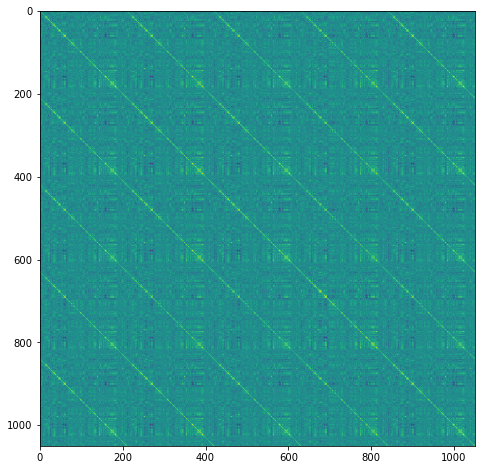

In [21]:
# visualize the feature correlation matrix. Feel free to construct your own groupings!
from sklearn import datasets


plt.figure(figsize=(8,8))
plt.imshow(df_train_full[df_train_full.erano == 1][features].corr())

In [12]:
all_target_corrs = (
    df_train_full.groupby("era")
    .apply(lambda d: d[targets].corrwith(d[target]))
    .iloc[:, 1:]
)

# selecting the most and least correlated targets to the scoring target
top_targets = list(all_target_corrs.mean(0).sort_values(ascending=False)[:7].index)
bottom_targets = list(all_target_corrs.mean(0).sort_values(ascending=False)[-2:].index)

# using only 7 most correlated targets
useful_targets = top_targets  # + bottom_targets

<AxesSubplot:ylabel='era'>

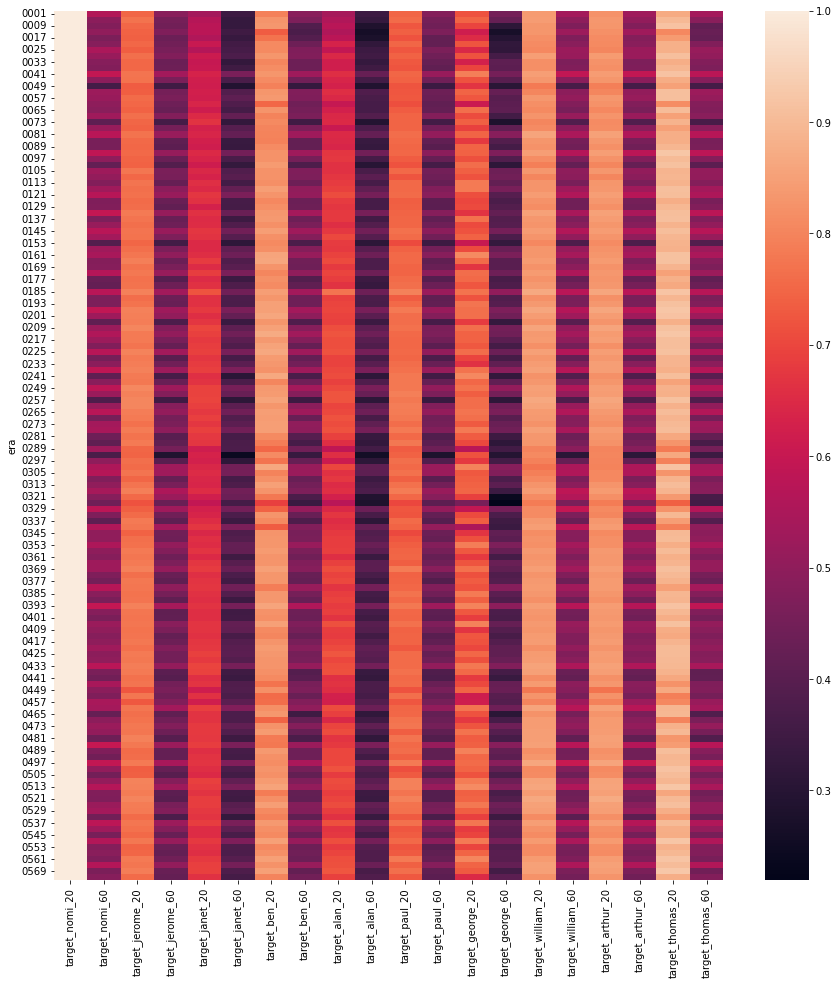

In [13]:
fig, ax = plt.subplots(figsize=(15, 16))
sns.heatmap(data=all_target_corrs, ax=ax)

In [16]:
# finding the most correlated(to scoring target) features across all eras 
all_feature_corrs = df_train_full.groupby("era").apply(lambda d: d[features].corrwith(d[target]))
abs_corr = all_feature_corrs.mean().abs().sort_values(ascending=False)[:len(features)]

# usign only 50% of most correlated(to scoring target) features to reduce memory usage
top_features = abs_corr[:int(len(abs_corr)*0.5)].index

<AxesSubplot:ylabel='era'>

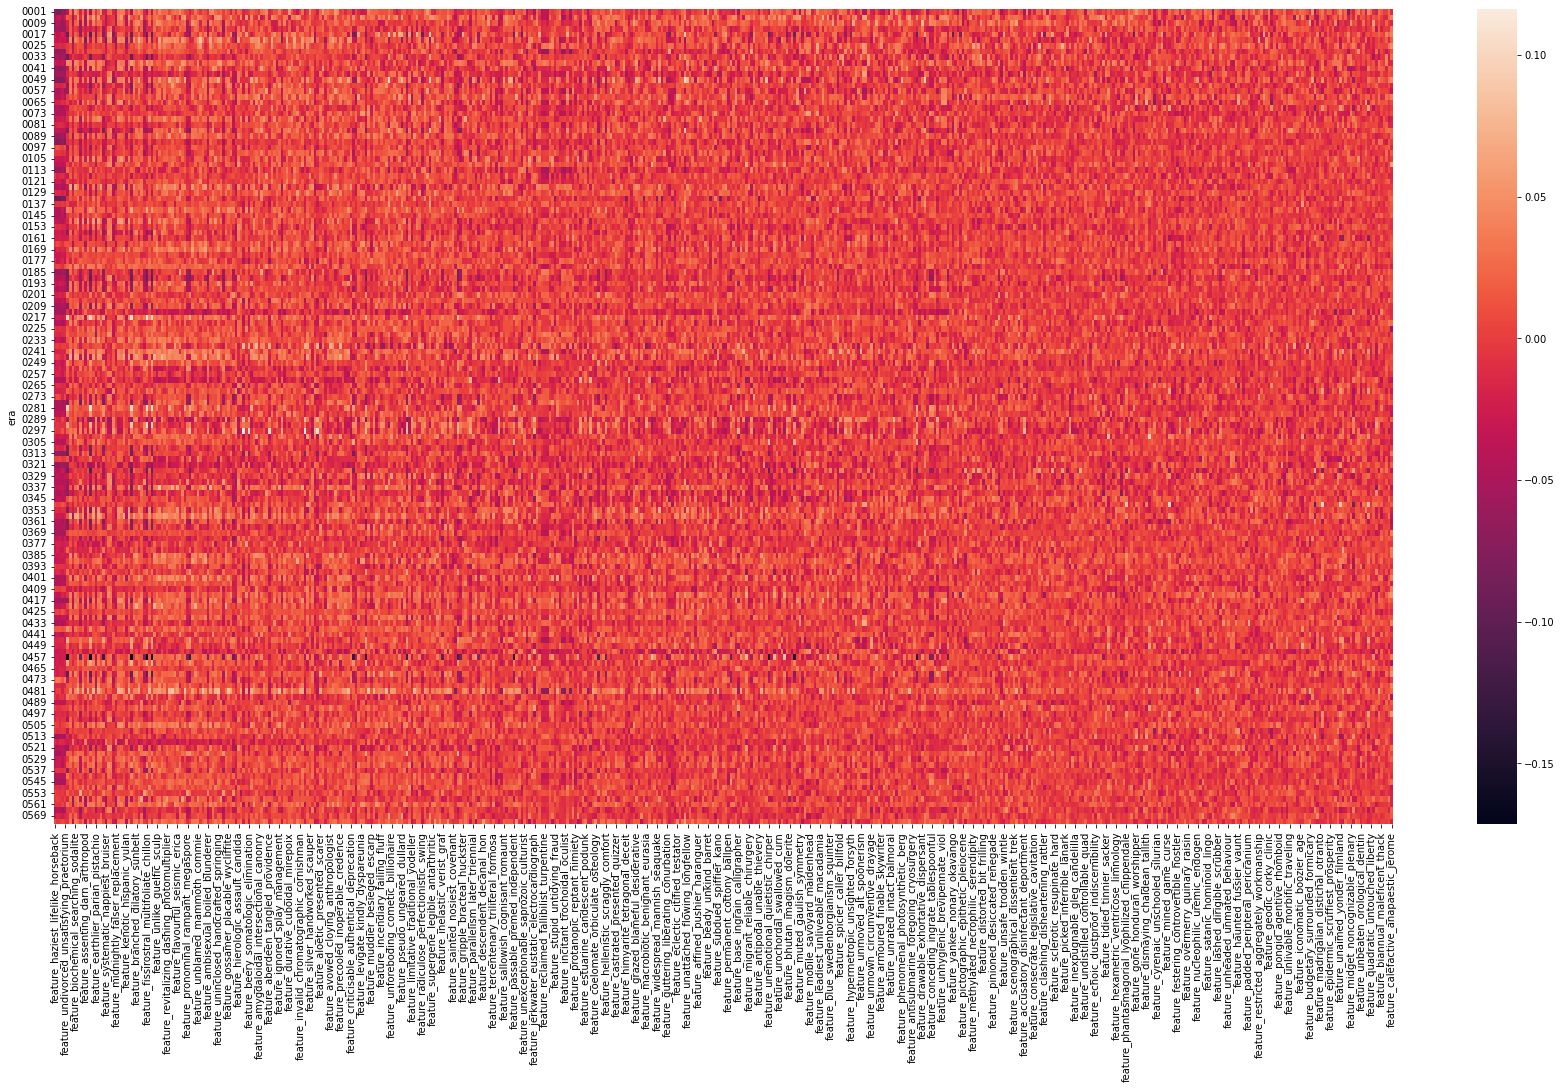

In [17]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(data=all_feature_corrs[top_features], ax=ax)

# Training Model (100 000 rows)

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(df_train_bestf[best_features], df_train_bestf[target])

RandomForestRegressor(random_state=0)

# Training Model (Full)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(df_train_random[features], df_train_random[target])

RandomForestRegressor(n_estimators=150, random_state=0)

# Predict new result

In [22]:
# df_val_full['prediction'] =  regressor.predict(df_val_full[best_features])

df_tour_full['prediction'] =  regressor.predict(df_tour_full[features])


# tourney_preds_1 = regressor.predict(df_val_full[top_features][:50000])
# tourney_preds_2 = regressor.predict(df_val_full[top_features][50000:100000])
# tourney_preds_3 = regressor.predict(df_val_full[top_features][100000:])
# df_val_full['prediction'] = np.concatenate((tourney_preds_1, tourney_preds_2, tourney_preds_3))

# Plotting Results

count    539658.000
mean          0.500
std           0.020
min           0.388
25%           0.486
50%           0.499
75%           0.513
max           0.605
Name: prediction, dtype: float64



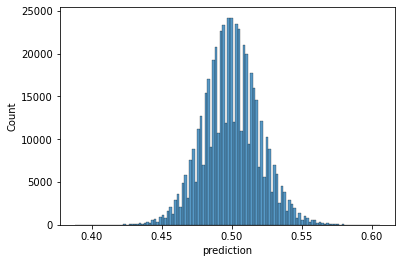

In [27]:
# Check distribution of predictions
print(df_val_full['prediction'].describe().round(3))
print()
sns.histplot(df_val_full['prediction'], bins=120)
plt.show()

In [62]:
# The models should be scored based on the rank-correlation (spearman) with the target
def numerai_score(y_true, y_pred):
    rank_pred = y_pred.groupby(eras).apply(lambda x: x.rank(pct=True, method="first"))
    return np.corrcoef(y_true, rank_pred)[0,1]

# It can also be convenient while working to evaluate based on the regular (pearson) correlation
def correlation_score(y_true, y_pred):
    return np.corrcoef(y_true, y_pred)[0,1]

def score(df, prediction):
    '''Takes df and calculates spearm correlation from pre-defined cols'''
    # method="first" breaks ties based on order in array
    return np.corrcoef(
        df['target'],
        df[prediction].rank(pct=True, method="first")
    )[0,1]

def run_analytics(era_scores):
    print(f"Mean Correlation: {era_scores.mean():.4f}")
    print(f"Median Correlation: {era_scores.median():.4f}")
    print(f"Standard Deviation: {era_scores.std():.4f}")
    print()
    print(f"Mean Pseudo-Sharpe: {era_scores.mean()/era_scores.std():.4f}")
    print(f"Median Pseudo-Sharpe: {era_scores.median()/era_scores.std():.4f}")
    print(f"Max Drawdown: {np.min(era_scores):.4f}")
    print()
    print(f'Hit Rate (% positive eras): {era_scores.apply(lambda x: np.sign(x)).value_counts()[1]/len(era_scores):.2%}')

    era_scores.rolling(10).mean().plot(kind='line', title='Rolling Per Era Correlation Mean', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()

    era_scores.cumsum().plot(title='Cumulative Sum of Era Scores', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()

count    539658.000
mean          0.497
std           0.027
min           0.362
25%           0.480
50%           0.498
75%           0.515
max           0.638
Name: prediction, dtype: float64



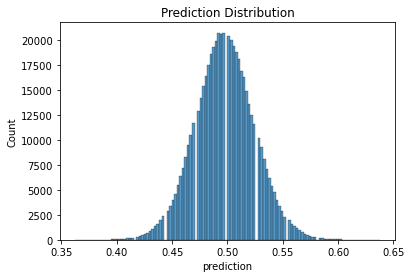


Training Correlation Score: 0.004964780006594958



KeyError: 'erano'

In [65]:
# Evaluate Training Data
df_val_full['prediction'] = regressor.predict(df_val_full[best_features])

# Check distribution of predictions
print(df_val_full['prediction'].describe().round(3))
print()
plt.title("Prediction Distribution")
sns.histplot(df_val_full['prediction'], bins=120)
plt.show()
print()

print("Training Correlation Score:", correlation_score(df_val_full['target'], df_val_full['prediction']))
print()
mean_train_era_scores = df_val_full.groupby(df_val_full['erano']).apply(score, prediction='prediction')
run_analytics(mean_train_era_scores)

In [19]:
# Instantiate Numerai API again but with API keys for submission
PUBLIC_KEY = 'lorem'
PRIVATE_KEY = 'ipsum'

napi = numerapi.NumerAPI(PUBLIC_KEY, PRIVATE_KEY)
current_round = napi.get_current_round()
print("ROUND NUMBER: ", current_round)

ROUND NUMBER:  310


In [23]:
# Format prediction CSV for submission
prediction_df = df_tour_full.reset_index()[['id', 'prediction']]
prediction_df[['id', 'prediction']].to_csv(f'round{current_round}_tour_model_RF_predictions.csv', index=False) # Important to name your CSV file so you know wh

In [25]:

model_id = ''
napi.upload_predictions(f'round{current_round}_tour_model_RF_predictions.csv', model_id=model_id, version=2)

2022-04-04 16:08:29,816 INFO numerapi.base_api: uploading predictions...


'e815e39c-d589-40f8-95b8-07fc25c02644'